In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential # create basic ANN model
from keras.layers import Dense # for hidden layers
from keras.layers import Dropout # to avoid overfitting
from keras.layers import PReLU, LeakyReLU,ELU # activation functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
# importing the data
data = pd.read_csv('Churn_Modelling.csv')

In [60]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
# Splitting the data into dependent and independent variable

X = data.iloc[:,3:13]
y = data.iloc[:,-1]

In [62]:
# Creating dummmies for the categorial feature

geo = pd.get_dummies(X.Geography, drop_first = True)
gen = pd.get_dummies(X.Gender, drop_first = True)

In [63]:
# Concat the dummy variables

In [64]:
X = pd.concat([X,geo,gen], axis = 1)

In [65]:
X = X.drop(['Geography','Gender'], axis= 1)

In [66]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [67]:
# Splitting the dataset into train test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [68]:
# Fearure scling has to be performed to reduce the computation time

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [69]:
# Initialising the ANN

ann = Sequential()

In [70]:
# Adding the input layer and the first hidden layer

ann.add(Dense(input_dim = 11, units = 6, kernel_initializer = 'he_uniform', activation = 'relu' ))

In [71]:
# Adding second hidden layer

ann.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [72]:
# output layer

ann.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [73]:
# Compiling the ann

ann.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
# Fitting the ANN to the training set

model = ann.fit(X_train,y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7673 - val_loss: 0.5004 - val_accuracy: 0.8057
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.8060 - val_loss: 0.4815 - val_accuracy: 0.8092
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.8068 - val_loss: 0.4692 - val_accuracy: 0.8092
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4579 - accuracy: 0.8120 - val_loss: 0.4610 - val_accuracy: 0.8113
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.8254 - val_loss: 0.4553 - val_accuracy: 0.8170
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8214 - val_loss: 0.4514 - val_accuracy: 0.8174
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4487 - val_accuracy: 0.8191

Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8410 - val_loss: 0.4122 - val_accuracy: 0.8235
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8323 - val_loss: 0.4113 - val_accuracy: 0.8256
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8318 - val_loss: 0.4104 - val_accuracy: 0.8260
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8342 - val_loss: 0.4094 - val_accuracy: 0.8260
Epoch 62/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3851 - accuracy: 0.8354 - val_loss: 0.4087 - val_accuracy: 0.8252
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8310 - val_loss: 0.4082 - val_accuracy: 0.8239
Epoch 64/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3777 - accuracy: 0.8335 - val_loss: 0.4074 - val_accuracy:

In [84]:
# Predictions the model

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [76]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[2247,  132],
       [ 336,  285]], dtype=int64)

In [85]:
# Calculate the accurary

score = accuracy_score(y_test,y_pred)
score

0.844

In [78]:
# list all data in history

print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


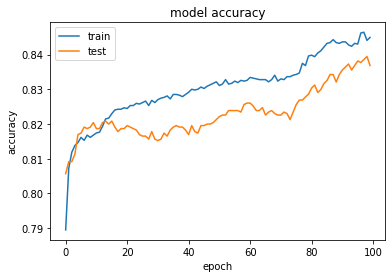

In [80]:
# summarize history for accuracy

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

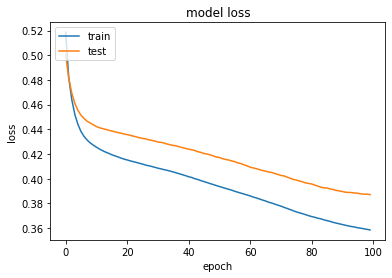

In [81]:
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()